In [18]:
import os
import sys
import librosa
import seaborn as sn
sys.path.insert(0, '../scripts')
import load_audio as la
import audio_manuplator as am
import load_transcriptions as ls
import visualize as vis
import audio_manuplator as am
import pandas as pd
import matplotlib.pyplot as plt

## Load Audio files

In [3]:
path ='../data/train/trsTrain.txt'
transcription_train = ls.tran_loader(path)
transcription_train["tr_2_tr01002"]

' የተ ለቀቁት ምርኮኞች በ አካባቢያቸው ሰላማዊ ኑሮ እንዲ ኖሩ የ ትራንስፖርት ና መጓጓዣ ገንዘብ ተሰጥቷ ቸው መሸኘታቸው ን አመልክቶ በ የ ዞ ናቸው እንደ ደረሱ መቃቋሚያ እንደሚ ሰጣቸው ም አስ ታውቋል '

In [4]:
df_train_data,df_train_audio = la.meta_data(transcription_train,'../data/train/wav/')
df_train_data.head()

,key,text,duration
0,../data/train/wav/tr_10_tr01010.wav,ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕ...,10.368
1,../data/train/wav/tr_100_tr01100.wav,አለቃ የጻፏቸው መጽሀፍት ውድ ና ጣፋጭ ከ መሆናቸው የተነሳ በ ህትመታቸ...,14.592
2,../data/train/wav/tr_101_tr02001.wav,በ ኮምፒውተር ሳይንስ ፎን ት ቴክኖሎጂ ለ ዶክትሬት ዲግሪ ጥናት እያደረ...,7.936
3,../data/train/wav/tr_102_tr02002.wav,የ ውሀው ዘርፍ ያለበት ን የ ፋይናንስ ችግር ለ መፍታት የ ውሀ ሀብት ...,6.528
4,../data/train/wav/tr_103_tr02003.wav,የ መንገደኞች ማስተናገጃ ህንጻው በ ሰአት እስከ ሶስት ሺ ያህል መንገደ...,6.528


In [5]:
# Display the sound and the transcription
print(df_train_data.loc[0,"text"])
vis.play_sound(df_train_data.loc[0,"key"])


 ግን ወደ ኋላው ላይ ኢሳያስ እንደ ልማ ዳቸው ሁሉን ም የ መልከ ፍ ዲፕሎማሲ ያቸው እስራኤል ንም ያስ ወር ፋቸው ጀመር 


In [6]:
print("There are ",len(df_train_audio)," files")
df_train_audio.head()

There are  1000  files


,key,audio,sr
0,../data/train/wav/tr_10_tr01010.wav,"[-0.0057678223, -0.006011963, -0.0059814453, -...",16000
1,../data/train/wav/tr_100_tr01100.wav,"[-0.005554199, -0.0052490234, -0.0058898926, -...",16000
2,../data/train/wav/tr_101_tr02001.wav,"[-0.0056762695, -0.005645752, -0.005645752, -0...",16000
3,../data/train/wav/tr_102_tr02002.wav,"[-0.004852295, -0.0048217773, -0.0048217773, -...",16000
4,../data/train/wav/tr_103_tr02003.wav,"[-0.0051879883, -0.0051574707, -0.005218506, -...",16000


In [7]:
pd.DataFrame({"count": df_train_audio.groupby("sr")["sr"].count()})


,count
sr,
16000,1000


### All 1000 files have the same sampling rate, which is 16,000. However, we will look at the sampling rates of the test data since we need to make them the same.

In [8]:
path ='../data/test/trsTest.txt'
transcription = ls.tran_loader(path)
df_test_data,df_test_audio = la.meta_data(transcription,'../data/test/wav/')
pd.DataFrame({"count": df_test_audio.groupby("sr")["sr"].count(),"total": df_test_audio['sr'].count()})

,count,total
sr,,
16000,358,358


### Since our sampling rate is the same all across and good enough for training. We will move on to checking the length of the audio data.

/home/dibora/AMH-STT/STT/lib/python3.7/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x288 with 0 Axes>

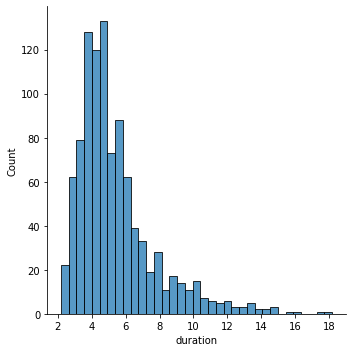

count    1000.000000
mean        5.399710
std         2.355497
min         2.176000
25%         3.840000
50%         4.736000
75%         6.144000
max        18.176000
Name: duration, dtype: float64

In [32]:
# pd.DataFrame({"count": df_train_data.groupby("duration")["duration"].count(),"total": df_train_audio['duration'].count()})
ax = plt.figure(figsize = [8,4])
sn.displot(df_train_data['duration'], ax=ax)
plt.show()
df_train_data['duration'].describe()
# print(df_duration['duration'])


#### We can see more than 75% of the data has duration less than 6 minutes so we might want to remove the files with duration greater than 8 minutes since truncating/padding data might not seem the best choice.

In [43]:
df_duration_choosen = df_train_data.query("duration <= 8")
df_duration_choosen.describe()
# Now that we thrown away files that have really long durations, we can resize them


,duration
count,882.000000
mean,4.711909
std,1.298025
min,2.176000
25%,3.712000
50%,4.480000
75%,5.504000
max,7.936000
